In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

In [60]:
df=pd.read_csv("UBER.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-30,24.420000,24.850000,24.240000,24.730000,24.730000,20474100
1,2023-01-03,25.370001,25.750000,25.020000,25.360001,25.360001,22155300
2,2023-01-04,25.730000,25.969999,25.320000,25.910000,25.910000,14816000
3,2023-01-05,25.730000,26.010000,25.549999,25.549999,25.549999,9942000
4,2023-01-06,25.860001,26.540001,25.400000,26.400000,26.400000,19443800
...,...,...,...,...,...,...,...
246,2023-12-22,61.700001,62.235001,61.279999,61.709999,61.709999,14709400
247,2023-12-26,61.709999,62.200001,61.313999,61.980000,61.980000,16077200
248,2023-12-27,62.000000,63.430000,62.000000,63.279999,63.279999,20806000
249,2023-12-28,63.450001,63.529999,62.834999,63.139999,63.139999,13795600


In [61]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-30,24.420000,24.850000,24.240000,24.730000,24.730000,20474100
1,2023-01-03,25.370001,25.750000,25.020000,25.360001,25.360001,22155300
2,2023-01-04,25.730000,25.969999,25.320000,25.910000,25.910000,14816000
3,2023-01-05,25.730000,26.010000,25.549999,25.549999,25.549999,9942000
4,2023-01-06,25.860001,26.540001,25.400000,26.400000,26.400000,19443800
5,2023-01-09,27.299999,28.049999,27.150000,27.400000,27.400000,24962100
6,2023-01-10,27.400000,28.250000,27.150000,28.040001,28.040001,15413700
7,2023-01-11,28.240000,28.520000,27.920000,28.350000,28.350000,15421700
8,2023-01-12,28.850000,29.184999,28.200001,29.030001,29.030001,17513400
9,2023-01-13,28.680000,29.500000,28.660000,29.440001,29.440001,16940700


In [62]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
241,2023-12-15,62.160000,63.529999,61.410000,61.860001,61.860001,364231800
242,2023-12-18,62.009998,62.490002,61.330002,61.730000,61.730000,28614000
243,2023-12-19,61.880001,62.700001,61.689999,62.119999,62.119999,26813800
244,2023-12-20,61.490002,62.279999,60.619999,60.680000,60.680000,28286100
245,2023-12-21,61.240002,61.759998,60.825001,61.459999,61.459999,19999600
246,2023-12-22,61.700001,62.235001,61.279999,61.709999,61.709999,14709400
247,2023-12-26,61.709999,62.200001,61.313999,61.980000,61.980000,16077200
248,2023-12-27,62.000000,63.430000,62.000000,63.279999,63.279999,20806000
249,2023-12-28,63.450001,63.529999,62.834999,63.139999,63.139999,13795600
250,2023-12-29,62.360001,63.139999,61.299999,61.570000,61.570000,21602500


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [64]:
df["Date"]=pd.to_datetime(df["Date"])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


Close column contains the values whose future values we want to predict. So let’s have a closer look at the historical close prices of Microsoft’s stock price:

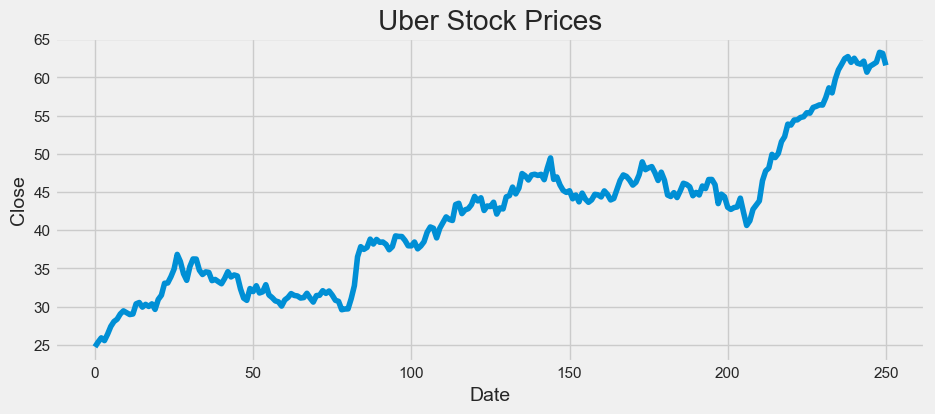

In [66]:
plt.figure(figsize=(10, 4))
plt.title("Uber Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.show()



looking at the correlation between the features of this dataset:

C:\Users\DELL\AppData\Local\Temp\ipykernel_16400\2458726984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
C:\Users\DELL\AppData\Local\Temp\ipykernel_16400\2458726984.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998216  0.998544  0.996247   0.996247  0.166012
High       0.998216  1.000000  0.998530  0.998729   0.998729  0.175550
Low        0.998544  0.998530  1.000000  0.998346   0.998346  0.156020
Close      0.996247  0.998729  0.998346  1.000000   1.000000  0.165777
Adj Close  0.996247  0.998729  0.998346  1.000000   1.000000  0.165777
Volume     0.166012  0.175550  0.156020  0.165777   0.165777  1.000000


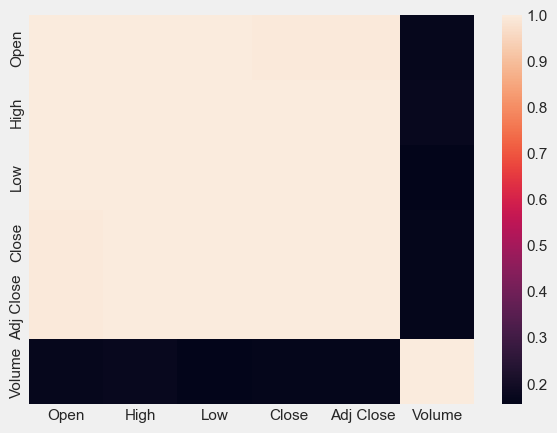

In [67]:
print(df.corr())
sns.heatmap(df.corr())
plt.show()

I will prepare the data to fit into the machine learning model. In this step, I will first add the most important features to x and the target column to y, and then I will divide the dataset into training and test sets:

In [68]:
x = df[["Open", "High", "Low"]]
y = df["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Using the Decision Tree Regression Algorithm to train the Uber Stock Price prediction model and have a look at the predicted stock prices for the next 5 days:

In [69]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0       44.349998
1       27.400000
2       43.830002
3       30.070000
4       41.410000


Calculating the models score.

In [70]:
score = model.score(xtest, ytest)
score

0.9919436554629808